#### Q4. Convolution Neural Networks
1. Design & describe an architecture for CNNs
2. Try different architecture (# of layers, convolution filter sizes, skipping connections)
3. Try different batch normalization techniques
4. drop-out, regulization -> improved generalization?
5. Try different loss functions
6. Try to compress nn (e.g. truncated SVD)
7. Change other major hyperparameter (e.g. learning rates, batch sizes)
8. Train CNN from scratch vs pre-trained and fine-tuning?
9. Compare with Q2 and Q3


In [1]:
import sys
import os
sys.path.append('../')

from CNN import cnn

from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch

In [2]:
# Define Dataset Paths and Transformations
current_dir = os.getcwd()
root_dir = os.path.join(current_dir, "../RF_code/Caltech_101")
transform = transforms.Compose([
    transforms.Resize((128,128)),  # Resize images
    transforms.ToTensor(),         # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Create Training and Testing Datasets
train_dataset = cnn.Caltech101Dataset(root_dir, transform=transform, train=True)
test_dataset = cnn.Caltech101Dataset(root_dir, transform=transform, train=False)

train_loader_16 = cnn.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader_16 = cnn.DataLoader(test_dataset, batch_size=16, shuffle=False)

train_loader_32 = cnn.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader_32 = cnn.DataLoader(test_dataset, batch_size=32, shuffle=False)

train_loader_64 = cnn.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader_64 = cnn.DataLoader(test_dataset, batch_size=64, shuffle=False)

train_loader_128 = cnn.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader_128 = cnn.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
# 4-1 -> in the report

Epoch 1/100, Loss: 2.4327
Epoch 2/100, Loss: 2.2089
Epoch 3/100, Loss: 2.0135
Epoch 4/100, Loss: 1.8075
Epoch 5/100, Loss: 1.4949
Epoch 6/100, Loss: 1.2565
Epoch 7/100, Loss: 1.1067
Epoch 8/100, Loss: 0.9383
Epoch 9/100, Loss: 0.7624
Epoch 10/100, Loss: 0.6940
Epoch 11/100, Loss: 0.5841
Epoch 12/100, Loss: 0.4496
Epoch 13/100, Loss: 0.3199
Epoch 14/100, Loss: 0.3430
Epoch 15/100, Loss: 0.2477
Epoch 16/100, Loss: 0.2588
Epoch 17/100, Loss: 0.1007
Epoch 18/100, Loss: 0.1486
Epoch 19/100, Loss: 0.1372
Epoch 20/100, Loss: 0.0911
Epoch 21/100, Loss: 0.1044
Epoch 22/100, Loss: 0.0609
Epoch 23/100, Loss: 0.1081
Epoch 24/100, Loss: 0.0783
Epoch 25/100, Loss: 0.0511
Epoch 26/100, Loss: 0.0445
Epoch 27/100, Loss: 0.0409
Epoch 28/100, Loss: 0.0277
Epoch 29/100, Loss: 0.0382
Epoch 30/100, Loss: 0.0276
Epoch 31/100, Loss: 0.0249
Epoch 32/100, Loss: 0.0396
Epoch 33/100, Loss: 0.0440
Epoch 34/100, Loss: 0.0178
Epoch 35/100, Loss: 0.0500
Epoch 36/100, Loss: 0.0495
Epoch 37/100, Loss: 0.0230
Epoch 38/1

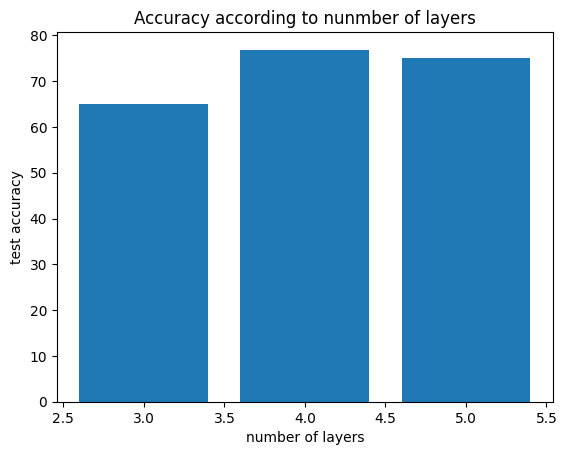

In [9]:
# 4-2
layers = [3, 4, 5]
test_accuracy_layers = []
for i in layers:
    model = cnn.CustomCNN(total_layers=i)

    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_32, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_32)
    test_accuracy_layers.append(test_accuracy)

print(test_accuracy_layers)
plt.figure()
plt.bar(layers, test_accuracy_layers)
plt.xlabel("number of layers")
plt.ylabel("test accuracy")
plt.title("Accuracy according to nunmber of layers")
plt.show()

Epoch 1/100, Loss: 2.3902
Epoch 2/100, Loss: 2.1791
Epoch 3/100, Loss: 1.8600
Epoch 4/100, Loss: 1.6666
Epoch 5/100, Loss: 1.4275
Epoch 6/100, Loss: 1.2698
Epoch 7/100, Loss: 1.0307
Epoch 8/100, Loss: 0.8863
Epoch 9/100, Loss: 0.6647
Epoch 10/100, Loss: 0.6338
Epoch 11/100, Loss: 0.4450
Epoch 12/100, Loss: 0.3597
Epoch 13/100, Loss: 0.2955
Epoch 14/100, Loss: 0.1902
Epoch 15/100, Loss: 0.2380
Epoch 16/100, Loss: 0.1298
Epoch 17/100, Loss: 0.1573
Epoch 18/100, Loss: 0.1402
Epoch 19/100, Loss: 0.0796
Epoch 20/100, Loss: 0.1111
Epoch 21/100, Loss: 0.1164
Epoch 22/100, Loss: 0.0878
Epoch 23/100, Loss: 0.0889
Epoch 24/100, Loss: 0.0475
Epoch 25/100, Loss: 0.0964
Epoch 26/100, Loss: 0.0412
Epoch 27/100, Loss: 0.0628
Epoch 28/100, Loss: 0.0386
Epoch 29/100, Loss: 0.0357
Epoch 30/100, Loss: 0.0682
Epoch 31/100, Loss: 0.0458
Epoch 32/100, Loss: 0.0293
Epoch 33/100, Loss: 0.0229
Epoch 34/100, Loss: 0.0201
Epoch 35/100, Loss: 0.0243
Epoch 36/100, Loss: 0.0130
Epoch 37/100, Loss: 0.0160
Epoch 38/1

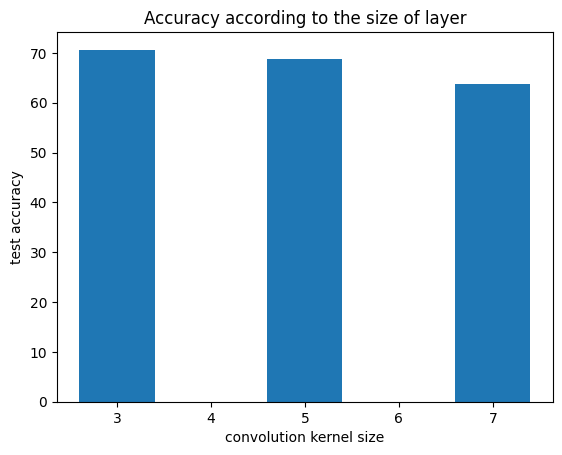

In [3]:
kernel_size = [3, 5, 7]
test_accuracy_kernel = []
for i in kernel_size:
    model = cnn.CustomCNN(conv_kernel_size = i)
    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_32, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_32)
    test_accuracy_kernel.append(test_accuracy)
    print(i)

print(test_accuracy_kernel)
plt.figure()
plt.bar(kernel_size, test_accuracy_kernel)
plt.xlabel("convolution kernel size")
plt.ylabel("test accuracy")
plt.title("Accuracy according to the size of layer")
plt.show()

Epoch 1/100, Loss: 2.3452
Epoch 2/100, Loss: 2.0452
Epoch 3/100, Loss: 1.8094
Epoch 4/100, Loss: 1.6000
Epoch 5/100, Loss: 1.4003
Epoch 6/100, Loss: 1.1421
Epoch 7/100, Loss: 0.9915
Epoch 8/100, Loss: 0.7575
Epoch 9/100, Loss: 0.7391
Epoch 10/100, Loss: 0.5251
Epoch 11/100, Loss: 0.3757
Epoch 12/100, Loss: 0.3041
Epoch 13/100, Loss: 0.3514
Epoch 14/100, Loss: 0.2418
Epoch 15/100, Loss: 0.1459
Epoch 16/100, Loss: 0.2202
Epoch 17/100, Loss: 0.1350
Epoch 18/100, Loss: 0.0975
Epoch 19/100, Loss: 0.1129
Epoch 20/100, Loss: 0.0992
Epoch 21/100, Loss: 0.0863
Epoch 22/100, Loss: 0.0778
Epoch 23/100, Loss: 0.0588
Epoch 24/100, Loss: 0.0832
Epoch 25/100, Loss: 0.0276
Epoch 26/100, Loss: 0.0412
Epoch 27/100, Loss: 0.0384
Epoch 28/100, Loss: 0.0382
Epoch 29/100, Loss: 0.0515
Epoch 30/100, Loss: 0.0258
Epoch 31/100, Loss: 0.0410
Epoch 32/100, Loss: 0.0295
Epoch 33/100, Loss: 0.0203
Epoch 34/100, Loss: 0.0385
Epoch 35/100, Loss: 0.0222
Epoch 36/100, Loss: 0.0181
Epoch 37/100, Loss: 0.0126
Epoch 38/1

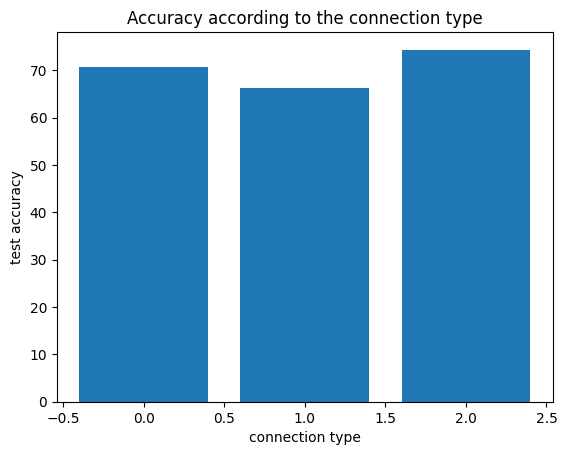

In [4]:
connection = [0, 1, 2]
test_accuracy_connection = []
for i in connection:
    model = cnn.CustomCNN(skip_connection = i)
    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_32, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_32)
    test_accuracy_connection.append(test_accuracy)

print(test_accuracy_connection)    
plt.figure()
plt.bar(connection, test_accuracy_connection)
plt.xlabel("connection type")
plt.ylabel("test accuracy")
plt.title("Accuracy according to the connection type")
plt.show()

Epoch 1/100, Loss: 2.3664
Epoch 2/100, Loss: 2.0654
Epoch 3/100, Loss: 1.8588
Epoch 4/100, Loss: 1.5875
Epoch 5/100, Loss: 1.3640
Epoch 6/100, Loss: 1.1572
Epoch 7/100, Loss: 0.9593
Epoch 8/100, Loss: 0.8413
Epoch 9/100, Loss: 0.6631
Epoch 10/100, Loss: 0.4779
Epoch 11/100, Loss: 0.4625
Epoch 12/100, Loss: 0.3644
Epoch 13/100, Loss: 0.2713
Epoch 14/100, Loss: 0.1759
Epoch 15/100, Loss: 0.2318
Epoch 16/100, Loss: 0.1198
Epoch 17/100, Loss: 0.1566
Epoch 18/100, Loss: 0.1369
Epoch 19/100, Loss: 0.0831
Epoch 20/100, Loss: 0.0880
Epoch 21/100, Loss: 0.0781
Epoch 22/100, Loss: 0.0800
Epoch 23/100, Loss: 0.0451
Epoch 24/100, Loss: 0.0619
Epoch 25/100, Loss: 0.0416
Epoch 26/100, Loss: 0.0386
Epoch 27/100, Loss: 0.0715
Epoch 28/100, Loss: 0.0206
Epoch 29/100, Loss: 0.0219
Epoch 30/100, Loss: 0.0274
Epoch 31/100, Loss: 0.0204
Epoch 32/100, Loss: 0.0104
Epoch 33/100, Loss: 0.0212
Epoch 34/100, Loss: 0.0101
Epoch 35/100, Loss: 0.0076
Epoch 36/100, Loss: 0.0136
Epoch 37/100, Loss: 0.0066
Epoch 38/1

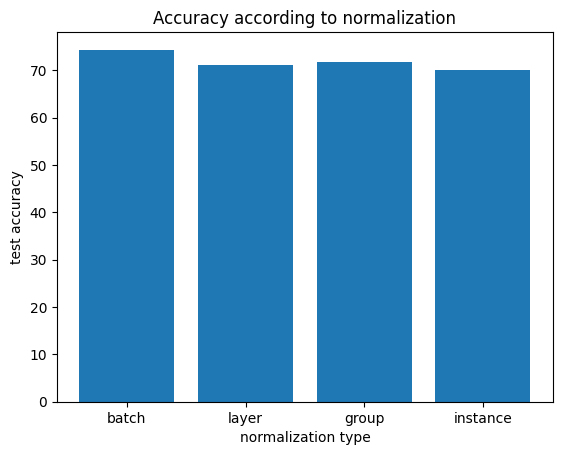

In [6]:
# 4-3

normalization_type =  ["batch", "layer", "group", "instance"]
test_accuracy_normalization = []

for i in normalization_type:
    model = cnn.CustomCNN(normalization="batch")
    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_32, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_32)
    test_accuracy_normalization.append(test_accuracy)

print(test_accuracy_normalization)
plt.figure()
plt.bar(normalization_type, test_accuracy_normalization)
plt.xlabel("normalization type")
plt.ylabel("test accuracy")
plt.title("Accuracy according to normalization")
plt.show()

In [10]:
# 4-4
# 다른 regularization은 maxpool, residual connection 등을 말하는건가?
# 일단 dropout만 함

model_w_do= cnn.CustomCNN() # model with dropout, base model
model_wo_do = cnn.CustomCNN(dropout=False) # model without dropout
criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
optimizer_w_do = optim.Adam(model_w_do.parameters(), lr=0.0005)
optimizer_wo_do = optim.Adam(model_wo_do.parameters(), lr=0.0005)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_w_do = model_w_do.to(device)
model_wo_do = model_wo_do.to(device)

train_losses_w_do = cnn.train_model(model_w_do, train_loader_32, optimizer_w_do, criterion=criterion, num_epochs=100)
test_accuracy_w_do = cnn.evaluate_model(model_w_do, test_loader_32)

train_losses_wo_do = cnn.train_model(model_wo_do, train_loader_32, optimizer_wo_do, criterion=criterion, num_epochs=100)
test_accuracy_wo_do = cnn.evaluate_model(model_wo_do, test_loader_32)

accuracy = [test_accuracy_w_do, test_accuracy_wo_do]
print(accuracy)

Epoch 1/100, Loss: 2.3871
Epoch 2/100, Loss: 2.1565
Epoch 3/100, Loss: 1.9477
Epoch 4/100, Loss: 1.7088
Epoch 5/100, Loss: 1.5085
Epoch 6/100, Loss: 1.3089
Epoch 7/100, Loss: 1.1277
Epoch 8/100, Loss: 1.0784
Epoch 9/100, Loss: 0.8705
Epoch 10/100, Loss: 0.6739
Epoch 11/100, Loss: 0.6829
Epoch 12/100, Loss: 0.6184
Epoch 13/100, Loss: 0.4597
Epoch 14/100, Loss: 0.3717
Epoch 15/100, Loss: 0.4502
Epoch 16/100, Loss: 0.3511
Epoch 17/100, Loss: 0.4288
Epoch 18/100, Loss: 0.3310
Epoch 19/100, Loss: 0.2364
Epoch 20/100, Loss: 0.1956
Epoch 21/100, Loss: 0.1916
Epoch 22/100, Loss: 0.0967
Epoch 23/100, Loss: 0.1012
Epoch 24/100, Loss: 0.0925
Epoch 25/100, Loss: 0.0821
Epoch 26/100, Loss: 0.0660
Epoch 27/100, Loss: 0.0323
Epoch 28/100, Loss: 0.0352
Epoch 29/100, Loss: 0.0411
Epoch 30/100, Loss: 0.0531
Epoch 31/100, Loss: 0.0436
Epoch 32/100, Loss: 0.0546
Epoch 33/100, Loss: 0.0184
Epoch 34/100, Loss: 0.0276
Epoch 35/100, Loss: 0.0257
Epoch 36/100, Loss: 0.0282
Epoch 37/100, Loss: 0.0296
Epoch 38/1

In [14]:
# 4-5

base_model = cnn.CustomCNN()

softmax = nn.CrossEntropyLoss() #softmax based loss
sqauredHinge = cnn.SquaredHingeLoss()  # squared hinge loss
optimizer = optim.Adam(base_model.parameters(), lr=0.0005)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = base_model.to(device)

train_losses = cnn.train_model(base_model, train_loader_32, optimizer, criterion=softmax, num_epochs=100)
test_accuracy = cnn.evaluate_model(base_model, test_loader_32)

train_losses_sh = cnn.train_model(base_model, train_loader_32, optimizer, criterion=sqauredHinge, num_epochs=100)
test_accuracy_sh = cnn.evaluate_model(base_model, test_loader_32)

accuracy = [test_accuracy, test_accuracy_sh]
print(accuracy)


Epoch 1/100, Loss: 2.3545
Epoch 2/100, Loss: 2.0071
Epoch 3/100, Loss: 1.8457
Epoch 4/100, Loss: 1.6476
Epoch 5/100, Loss: 1.4363
Epoch 6/100, Loss: 1.1424
Epoch 7/100, Loss: 0.9301
Epoch 8/100, Loss: 0.8398
Epoch 9/100, Loss: 0.6989
Epoch 10/100, Loss: 0.5108
Epoch 11/100, Loss: 0.4597
Epoch 12/100, Loss: 0.3796
Epoch 13/100, Loss: 0.3186
Epoch 14/100, Loss: 0.2078
Epoch 15/100, Loss: 0.2055
Epoch 16/100, Loss: 0.2087
Epoch 17/100, Loss: 0.1671
Epoch 18/100, Loss: 0.0929
Epoch 19/100, Loss: 0.0843
Epoch 20/100, Loss: 0.0642
Epoch 21/100, Loss: 0.0716
Epoch 22/100, Loss: 0.0985
Epoch 23/100, Loss: 0.1002
Epoch 24/100, Loss: 0.0702
Epoch 25/100, Loss: 0.0666
Epoch 26/100, Loss: 0.0431
Epoch 27/100, Loss: 0.0330
Epoch 28/100, Loss: 0.0659
Epoch 29/100, Loss: 0.0752
Epoch 30/100, Loss: 0.0439
Epoch 31/100, Loss: 0.0509
Epoch 32/100, Loss: 0.0482
Epoch 33/100, Loss: 0.0118
Epoch 34/100, Loss: 0.0280
Epoch 35/100, Loss: 0.0182
Epoch 36/100, Loss: 0.0212
Epoch 37/100, Loss: 0.0148
Epoch 38/1

In [13]:
# 4-6

model_svd = cnn.CustomCNN(compress_rank=128)

optimizer = optim.Adam(model_svd.parameters(), lr=0.0005)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_svd = model_svd.to(device)

train_losses = cnn.train_model(model_svd, train_loader_32, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
model.compress_fc_layers
test_accuracy = cnn.evaluate_model(model_svd, test_loader_32)

Epoch 1/100, Loss: 2.3069
Epoch 2/100, Loss: 2.0517
Epoch 3/100, Loss: 1.7316
Epoch 4/100, Loss: 1.6242
Epoch 5/100, Loss: 1.3115
Epoch 6/100, Loss: 1.1182
Epoch 7/100, Loss: 0.9331
Epoch 8/100, Loss: 0.8325
Epoch 9/100, Loss: 0.6276
Epoch 10/100, Loss: 0.5368
Epoch 11/100, Loss: 0.4195
Epoch 12/100, Loss: 0.3530
Epoch 13/100, Loss: 0.3279
Epoch 14/100, Loss: 0.2882
Epoch 15/100, Loss: 0.2229
Epoch 16/100, Loss: 0.1769
Epoch 17/100, Loss: 0.2003
Epoch 18/100, Loss: 0.1434
Epoch 19/100, Loss: 0.2142
Epoch 20/100, Loss: 0.0912
Epoch 21/100, Loss: 0.1315
Epoch 22/100, Loss: 0.0669
Epoch 23/100, Loss: 0.0405
Epoch 24/100, Loss: 0.0765
Epoch 25/100, Loss: 0.0255
Epoch 26/100, Loss: 0.0292
Epoch 27/100, Loss: 0.0203
Epoch 28/100, Loss: 0.0463
Epoch 29/100, Loss: 0.0247
Epoch 30/100, Loss: 0.0191
Epoch 31/100, Loss: 0.0077
Epoch 32/100, Loss: 0.0133
Epoch 33/100, Loss: 0.0103
Epoch 34/100, Loss: 0.0191
Epoch 35/100, Loss: 0.0140
Epoch 36/100, Loss: 0.0053
Epoch 37/100, Loss: 0.0137
Epoch 38/1

Epoch 1/100, Loss: 2.2766
Epoch 2/100, Loss: 2.0579
Epoch 3/100, Loss: 1.7994
Epoch 4/100, Loss: 1.5909
Epoch 5/100, Loss: 1.4766
Epoch 6/100, Loss: 1.1679
Epoch 7/100, Loss: 1.0136
Epoch 8/100, Loss: 0.8221
Epoch 9/100, Loss: 0.7346
Epoch 10/100, Loss: 0.6347
Epoch 11/100, Loss: 0.5958
Epoch 12/100, Loss: 0.4600
Epoch 13/100, Loss: 0.3659
Epoch 14/100, Loss: 0.3019
Epoch 15/100, Loss: 0.2718
Epoch 16/100, Loss: 0.2324
Epoch 17/100, Loss: 0.2068
Epoch 18/100, Loss: 0.1698
Epoch 19/100, Loss: 0.1458
Epoch 20/100, Loss: 0.1421
Epoch 21/100, Loss: 0.1053
Epoch 22/100, Loss: 0.1153
Epoch 23/100, Loss: 0.0833
Epoch 24/100, Loss: 0.1041
Epoch 25/100, Loss: 0.0626
Epoch 26/100, Loss: 0.0595
Epoch 27/100, Loss: 0.0476
Epoch 28/100, Loss: 0.0638
Epoch 29/100, Loss: 0.0337
Epoch 30/100, Loss: 0.0516
Epoch 31/100, Loss: 0.0389
Epoch 32/100, Loss: 0.0305
Epoch 33/100, Loss: 0.0366
Epoch 34/100, Loss: 0.0199
Epoch 35/100, Loss: 0.0233
Epoch 36/100, Loss: 0.0229
Epoch 37/100, Loss: 0.0388
Epoch 38/1

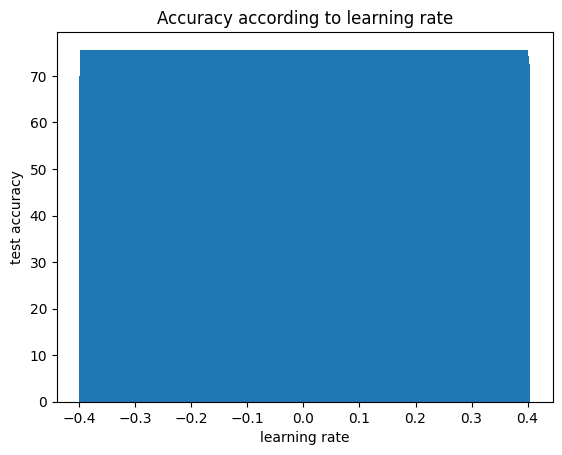

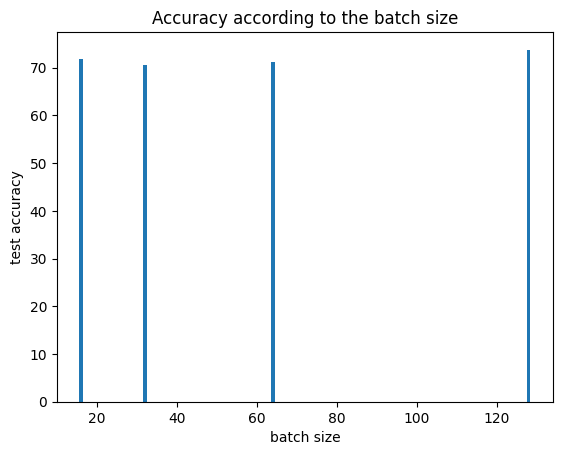

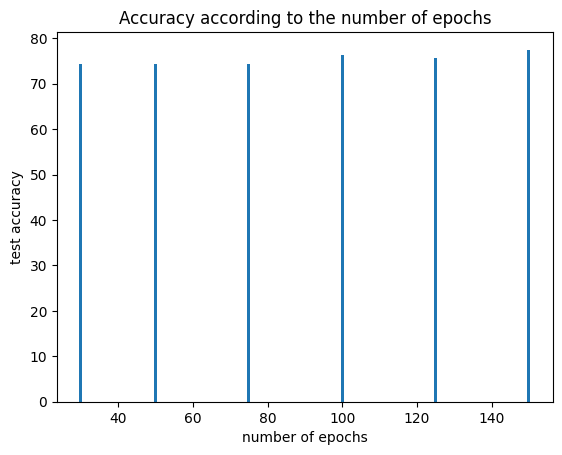

In [15]:
# 4-7
# epoch도 추가하기

base_model = cnn.CustomCNN()

softmax = nn.CrossEntropyLoss() #softmax based loss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = base_model.to(device)

# learning_rate
learning_rate = [0.0002, 0.0005, 0.001, 0.0015, 0.002, 0.005]
test_accuracy_lr = []
for i in learning_rate:
    optimizer = optim.Adam(base_model.parameters(), lr=i)

    train_losses = cnn.train_model(base_model, train_loader_32, optimizer, criterion=softmax, num_epochs=100)
    test_accuracy = cnn.evaluate_model(base_model, test_loader_32)
    test_accuracy_lr.append(test_accuracy)

# batch sizes
train_loaders = [train_loader_16, train_loader_32, train_loader_64, train_loader_128]
test_loaders = [test_loader_16, test_loader_32, test_loader_64, test_loader_128]
optimizer = optim.Adam(base_model.parameters(), lr=0.0005)
test_accuracy_batch = []
for i in range(4):
    train_losses = cnn.train_model(base_model, train_loaders[i], optimizer, criterion=softmax, num_epochs=100)
    test_accuracy = cnn.evaluate_model(base_model, test_loaders[i])
    test_accuracy_batch.append(test_accuracy)

# number of epochs
epochs = [30, 50, 75, 100, 125, 150]
optimizer = optim.Adam(base_model.parameters(), lr=0.0005)
test_accuracy_epoch = []
for i in epochs:
    train_losses = cnn.train_model(base_model, train_loader_32, optimizer, criterion=softmax, num_epochs=i)
    test_accuracy = cnn.evaluate_model(base_model, test_loader_32)
    test_accuracy_epoch.append(test_accuracy)

plt.figure()
plt.bar(learning_rate, test_accuracy_lr)
plt.xlabel("learning rate")
plt.ylabel("test accuracy")
plt.title("Accuracy according to learning rate")
plt.show()

batch_size = [16, 32, 64, 128]
plt.figure()
plt.bar(batch_size, test_accuracy_batch)
plt.xlabel("batch size")
plt.ylabel("test accuracy")
plt.title("Accuracy according to the batch size")
plt.show()

plt.figure()
plt.bar(epochs, test_accuracy_epoch)
plt.xlabel("number of epochs")
plt.ylabel("test accuracy")
plt.title("Accuracy according to the number of epochs")
plt.show()

In [17]:
print(learning_rate)
print(test_accuracy_lr)

print(batch_size)
print(test_accuracy_batch)

print(epochs)
print(test_accuracy_epoch)

[0.0002, 0.0005, 0.001, 0.0015, 0.002, 0.005]
[70.0, 75.625, 75.0, 74.375, 74.375, 72.5]
[16, 32, 64, 128]
[71.875, 70.625, 71.25, 73.75]
[30, 50, 75, 100, 125, 150]
[74.375, 74.375, 74.375, 76.25, 75.625, 77.5]
